## Why use scikit-learn?
* It's a Python library for maching learning with "simple and efficient tools for data mining and data analysis"

In [1]:
from sklearn import svm, datasets, model_selection, preprocessing
import matplotlib.pyplot as plt
import numpy as np

#### Import some datasets that come with sklearn

In [2]:
iris = datasets.load_iris()
house = datasets.load_boston()

## Some teaser functions in sklearn 

### Classification: Let's classify types of flowers based on their physical features!

In [3]:
# what's in the iris dataset?
print(iris.keys())

dict_keys(['DESCR', 'target_names', 'feature_names', 'target', 'data'])


In [4]:
# how many data points and how many features do we have?
print(iris.data.shape)

(150, 4)


In [5]:
# what are our features?
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# what are we classifying?
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [7]:
# labels for targets
np.unique(iris.target)

array([0, 1, 2])

In [8]:
# example of features for one data point
iris.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

#### Let's train a model to classify versicolor vs virginica flowers

In [9]:
# mask to get rid of the flower we don't care about
mask = iris.target>0

#### Define our feature vector and target

In [10]:
# we're going to predict flower type based on all their features
X = iris.data[mask]
y = iris.target[mask]

#### Let's split the data into training and test sets

In [11]:
# let's train on 66% of the sample and test on the remaining 33%
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=3)

#### Define our classifier

In [12]:
# let's use support vector classification with a linear kernel
clf = svm.SVC(kernel='linear', C=1.0)
# fit to the training data
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Predict on the test data

In [13]:
# predicted labels of y_test 
clf.predict(X_test)

array([2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 2, 2, 1, 2, 1, 2, 1, 1, 1])

In [14]:
# accuracy of classifications
clf.score(X_test,y_test)

0.96969696969696972

### Let's check out the model from the classification!

In [15]:
print('Features: ',iris.feature_names)
print('Weights of the features: ',clf.coef_)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Weights of the features:  [[-0.79120531 -0.34470661  1.95158976  1.71438728]]


* so we can see that petal length and petal width are pretty important features in this model compared to the other features at classifying versicolor vs virginica flowers

### Regression: Let's predict housing prices based on some features!

In [16]:
print(house.keys())

dict_keys(['DESCR', 'target', 'feature_names', 'data'])


In [17]:
print(house.data.shape)

(506, 13)


In [18]:
house.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

#### Define our feature vector and target

In [19]:
X = house.data
y = house.target

#### Let's split the data into training and test sets 

In [20]:
# let's train on 66% of the sample and test on the remaining 33%
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=5)

### BUT WAIT: Let's scale our data by removing the mean and scaling to unit variance first!
* Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

In [21]:
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
# fit to training data and transform the training data
X_train = scaler.fit_transform(X_train)

In [22]:
# scaled data
X_train

array([[ 0.9118389 , -0.50241886,  1.07230484, ...,  0.80807825,
        -2.84295938,  1.52320257],
       [-0.41172732, -0.50241886, -1.12979483, ..., -0.30417427,
         0.42743634, -0.99523956],
       [ 0.12458293, -0.50241886,  1.07230484, ...,  0.80807825,
        -0.05335342, -0.76564608],
       ..., 
       [-0.39713851, -0.50241886, -0.18839347, ...,  0.3446397 ,
         0.38630716,  0.71962537],
       [-0.3910951 , -0.50241886, -0.05347927, ...,  0.06657657,
         0.4043083 , -0.22000723],
       [-0.40576854,  3.07573229, -1.35465184, ...,  1.64226764,
         0.18977581, -0.98531886]])

In [23]:
# raw data
X

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [24]:
# transform the testing data based on the scaling done for the training data
X_test = scaler.transform(X_test)

### Back to the regression

#### Define our classifier

In [25]:
# let's use support vector regression with an RBF kernel
svr_l = svm.SVR(kernel='rbf')
# fit to the training data
svr_l.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### Predict on our test data

In [26]:
# make the prediction on the test data
y_pred = svr_l.predict(X_test)
# accuracy of classifications
print('R2 of the prediction: ',svr_l.score(X_test,y_test))

R2 of the prediction:  0.540467672971


#### Let's plot out predicted values against the actual values to visualize how well the model performed

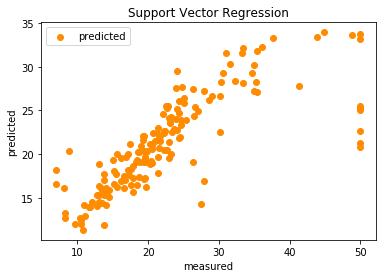

In [27]:
plt.scatter(y_test, y_pred, color='darkorange', label='predicted')
plt.xlabel('measured')
plt.ylabel('predicted')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

## More scikit-learn fun next week!
* all about sklearn here: http://scikit-learn.org/stable/
* installation info: http://scikit-learn.org/stable/install.html
* slack me if you have questions: @angelatam